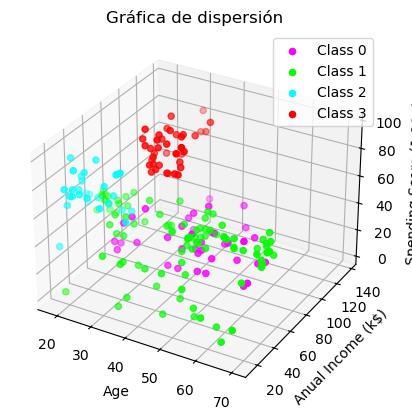

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import tkinter as tk
import matplotlib.pyplot as plt
import pandas as pd
from tkinter import simpledialog
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


dataframe = pd.read_csv('Mall_Customers.csv')

#Obtiene las caracteristicas de interés
X = dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']]
k=4
#Inicialización para algoritmo de clustering con el parámetro K indicado por el usuario
kmeansModel = KMeans(n_clusters=k,random_state=42, n_init=10)

#Carga los datos
kmeansModel.fit(X)

#Obtiene los centroides
centroides = kmeansModel.cluster_centers_


#Obtiene una lista con las etiquetas de los datos
etiqueta = kmeansModel.predict(X)   

# Agrega al frame de datos una columna para las etiquetas de clasificación
# al dataframe original
dataframe['Class'] = etiqueta


# Crear una figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores para las diferentes clases
colors = ['magenta', 'lime', 'cyan','red','royalblue','chocolate','gold','darkviolet','forestgreen','gray']

# Graficar los datos
for i in range(k):
    # Seleccionar puntos de la clase i
    xs = dataframe[dataframe['Class'] == i]['Age']
    ys = dataframe[dataframe['Class'] == i]['Annual Income (k$)']
    zs = dataframe[dataframe['Class'] == i]['Spending Score (1-100)']
    ax.scatter(xs, ys, zs, c=colors[i], label=f'Class {i}')


# Etiquetas de los ejes
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Título y leyenda
ax.set_title('Gráfica de dispersión')
ax.legend()
plt.show()

In [2]:

print("\nMétricas de rendimiento\n")

# Evaluar el coeficiente de silueta
silhouette_avg = silhouette_score(X, kmeansModel.labels_)
print(f"Coeficiente de silueta: {silhouette_avg:.4f} (Es mejor si está más cerca de 1)")

# Evaluar el índice de Davies-Bouldin
db_index = davies_bouldin_score(X, kmeansModel.labels_)
print(f"Índice de Davies-Bouldin: {db_index:.4f} (Es mejor si está más cerca de 0)")

# Evaluar el índice de Calinski-Harabasz
ch_index = calinski_harabasz_score(X, kmeansModel.labels_)
print(f"Índice de Calinski-Harabasz: {ch_index:.4f} (Entre más alto mejor)")

dataframe=dataframe.sort_values(by='Class',ascending=True)

dataframe.to_csv('Mall_Customers_Clusters.csv', encoding='ISO-8859-1', index=False)


Métricas de rendimiento

Coeficiente de silueta: 0.4055 (Es mejor si está más cerca de 1)
Índice de Davies-Bouldin: 0.8915 (Es mejor si está más cerca de 0)
Índice de Calinski-Harabasz: 127.9838 (Entre más alto mejor)
